<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is03_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Perceptron

## regression

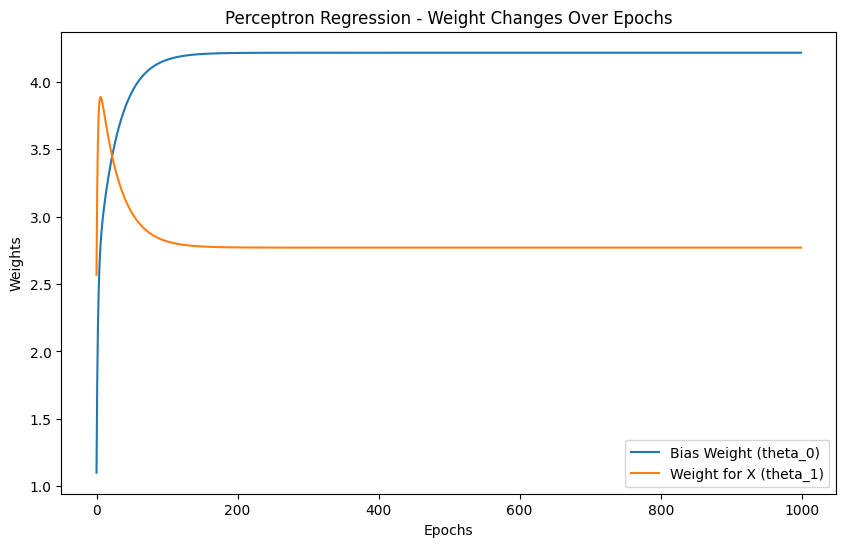

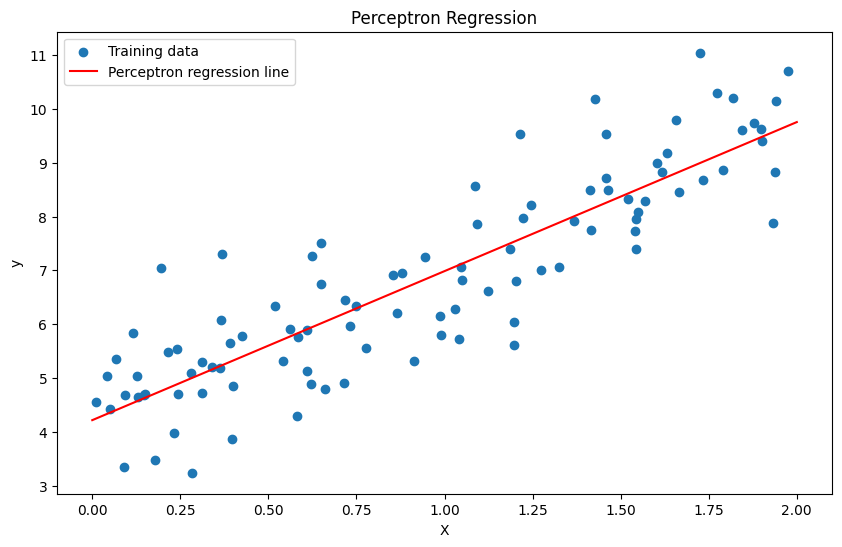

In [5]:


# Data generation (noisy linear data)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Adding bias term to the data
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term

# Initialize weights
theta = np.random.randn(2, 1)

# Learning rate and number of iterations
learning_rate = 0.1
n_iterations = 1000

# Lists to store the weight changes
theta_history = []

# Gradient descent to update weights
for iteration in range(n_iterations):
    gradients = 2/len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients
    theta_history.append(theta.copy())  # Save weights for each epoch

# Plot weight changes over epochs
theta_history = np.array(theta_history)
epochs = np.arange(n_iterations)

plt.figure(figsize=(10, 6))
plt.plot(epochs, theta_history[:, 0], label='Bias Weight (theta_0)')
plt.plot(epochs, theta_history[:, 1], label='Weight for X (theta_1)')
plt.title('Perceptron Regression - Weight Changes Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.legend()
plt.show()

# Predict values for regression line
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term
y_predict = X_new_b.dot(theta)

# Plotting the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Training data')
plt.plot(X_new, y_predict, "r-", label='Perceptron regression line')
plt.title('Perceptron Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## discriminator

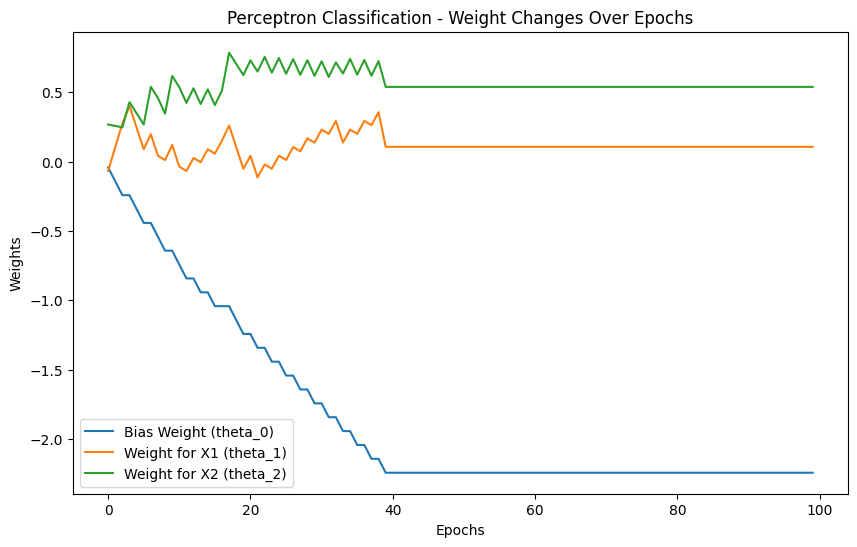

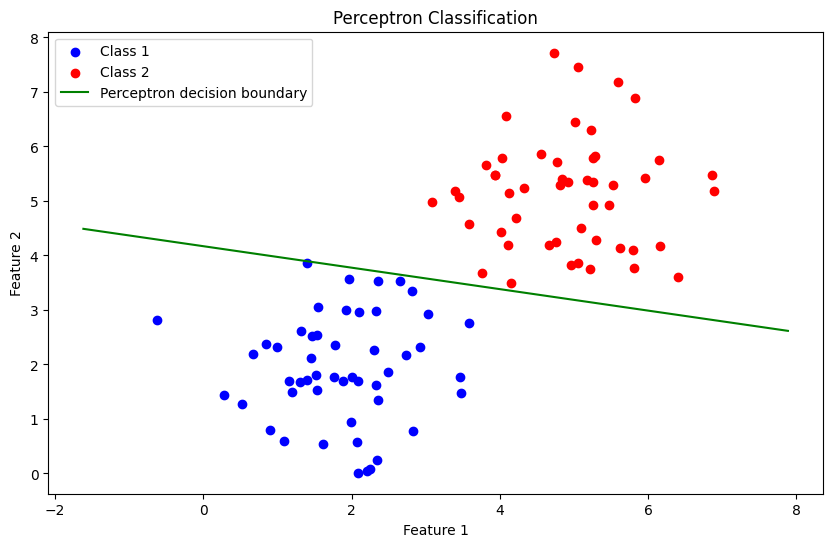

In [6]:


# Data generation (2-class data)
np.random.seed(42)
X1 = np.random.randn(50, 2) + np.array([2, 2])
X2 = np.random.randn(50, 2) + np.array([5, 5])
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(50), np.ones(50)))

# Add bias term to the data
X_b = np.c_[np.ones((100, 1)), X]

# Initialize perceptron weights
theta = np.random.randn(3)

# Learning rate and number of iterations
learning_rate = 0.1
n_iterations = 100

# Lists to store the weight changes
theta_history = []

# Perceptron training
for iteration in range(n_iterations):
    for i in range(len(X_b)):
        if (X_b[i].dot(theta) >= 0) != y[i]:
            theta += learning_rate * (y[i] - (X_b[i].dot(theta) >= 0)) * X_b[i]
    theta_history.append(theta.copy())  # Save weights for each epoch

# Plot weight changes over epochs
theta_history = np.array(theta_history)
epochs = np.arange(n_iterations)

plt.figure(figsize=(10, 6))
plt.plot(epochs, theta_history[:, 0], label='Bias Weight (theta_0)')
plt.plot(epochs, theta_history[:, 1], label='Weight for X1 (theta_1)')
plt.plot(epochs, theta_history[:, 2], label='Weight for X2 (theta_2)')
plt.title('Perceptron Classification - Weight Changes Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Weights')
plt.legend()
plt.show()

# Plotting the scatter plot and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Class 2')

# Decision boundary
x_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
y_vals = -(theta[1] * x_vals + theta[0]) / theta[2]
plt.plot(x_vals, y_vals, "g-", label="Perceptron decision boundary")

plt.title('Perceptron Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
